In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv('homeprices.csv')

In [5]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [10]:
import math
median_bedroom = math.floor(df.bedrooms.median())

In [11]:
median_bedroom

4

In [12]:
df.bedrooms = df.bedrooms.fillna(median_bedroom)

In [13]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.predict([[1200, 3, 30]])

array([329013.03517079])

In [17]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [18]:
reg.intercept_

221323.00186540408

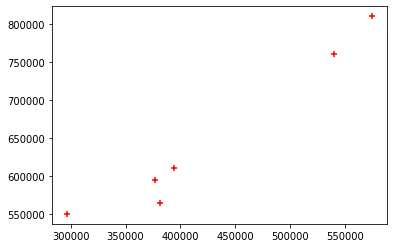

In [23]:
%matplotlib inline
plt.scatter(((df.area * 112.06) + (df.bedrooms * 23388.88)) + (df.age * -3231.7178), df[['price']], color = 'red', marker = '+')